In [26]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/test-file/tested.csv


In [27]:
db = pd.read_csv("/kaggle/input/test-file/tested.csv")

In [28]:
db

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [29]:
db.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [30]:
db.shape

(418, 12)

In [31]:
db.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [32]:
db.duplicated().sum()

0

In [33]:
db.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [34]:
db['Sex'].value_counts()

Sex
male      266
female    152
Name: count, dtype: int64

In [35]:
db['Survived'].value_counts()

Survived
0    266
1    152
Name: count, dtype: int64

In [36]:
db['Pclass'].value_counts()

Pclass
3    218
1    107
2     93
Name: count, dtype: int64

To see data in terms of clean and unclean

# DATA VISUALIZATION ACCORDING TO GENDER

<Axes: title={'center': 'passenger on the titanic '}, xlabel='Sex'>

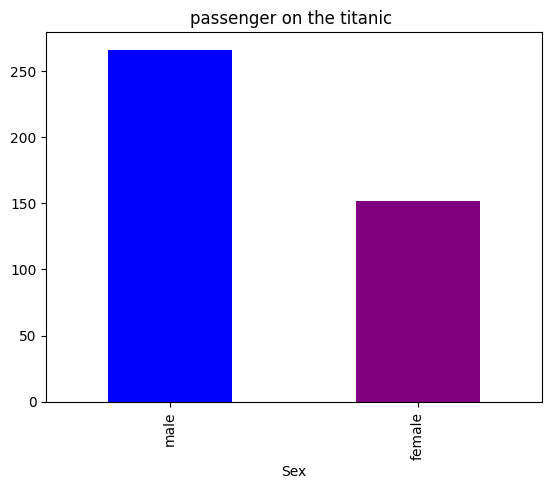

In [38]:
db['Sex'].value_counts().plot.bar(title="passenger on the titanic ", color=['blue', 'purple'])

<Axes: ylabel='count'>

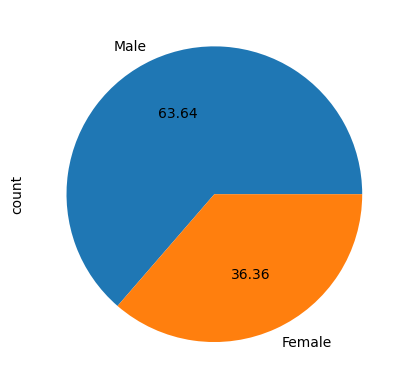

In [39]:
db['Sex'].value_counts().plot.pie(labels=["Male","Female"], autopct='%.2f')

# BY FARE

<Axes: xlabel='Age', ylabel='Fare'>

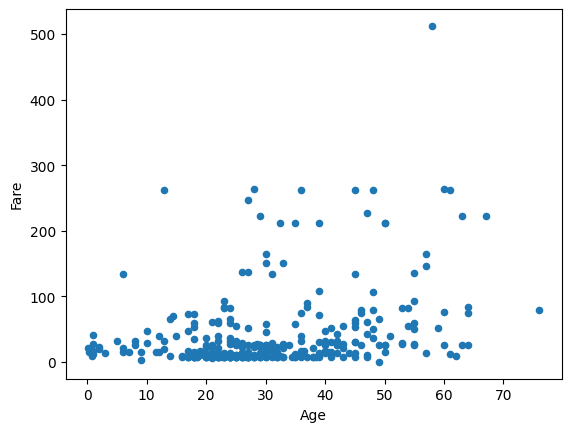

In [40]:
db.plot.scatter(x="Age",y="Fare")

<Axes: xlabel='Pclass', ylabel='Fare'>

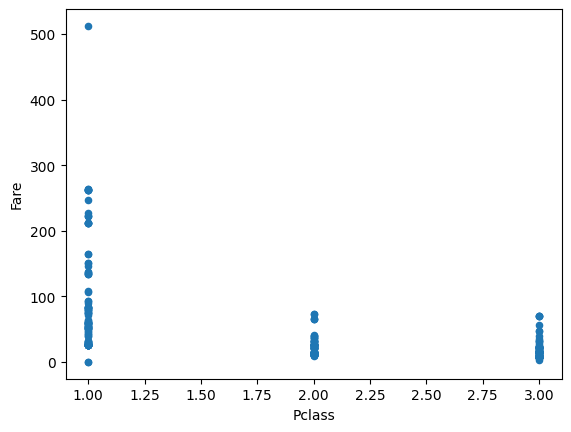

In [41]:
db.plot.scatter(x="Pclass",y="Fare")

<Axes: xlabel='Sex', ylabel='Survived'>

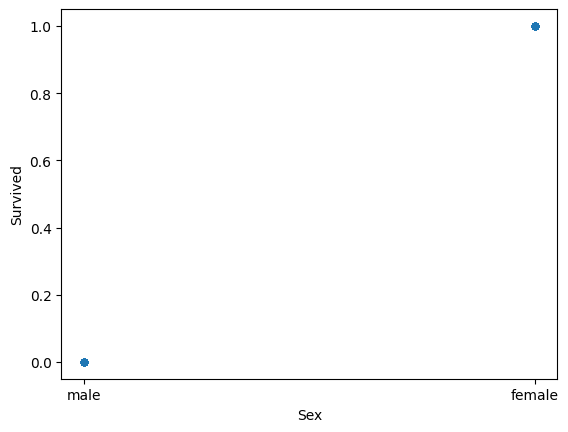

<Axes: >

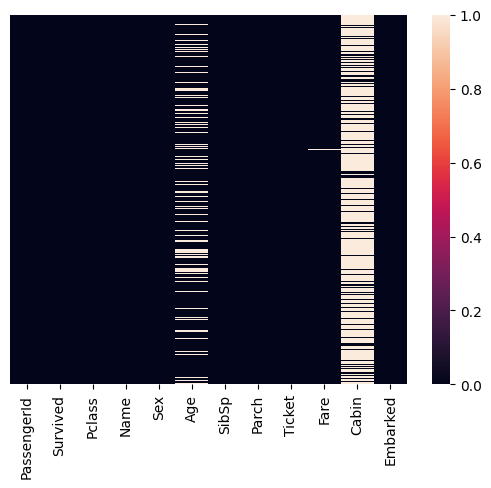

In [42]:
sns.heatmap(db.isnull(),yticklabels=False)

The most null values are in age and cabin columns.

In [45]:
age_mean = db['Age'].mean()
age_mean

30.272590361445783

In [46]:
db['Age'] = db["Age"].fillna(value=age_mean)

In [47]:
db.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [48]:
fare_mean = db['Fare'].mean()
fare_mean

35.627188489208635

In [50]:
db['Fare'] = db["Fare"].fillna(value=fare_mean)

In [51]:
db.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [52]:
db['Cabin']. value_counts()

Cabin
B57 B59 B63 B66    3
B45                2
C89                2
C55 C57            2
A34                2
                  ..
E52                1
D30                1
E31                1
C62 C64            1
C105               1
Name: count, Length: 76, dtype: int64

In [54]:
cabin_mode = db['Cabin'].mode()[0]
cabin_mode

'B57 B59 B63 B66'

In [55]:
db['Cabin'] = db["Cabin"].fillna(value=cabin_mode)

In [56]:
db.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

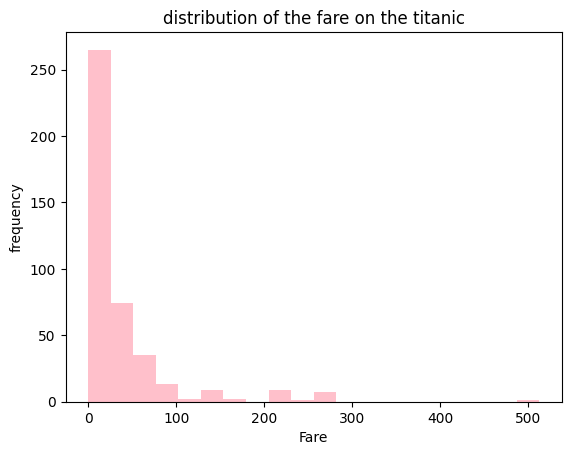

In [59]:
plt.hist(db['Fare'],bins=20,color="pink")
plt.title("distribution of the fare on the titanic")
plt.xlabel("Fare")
plt.ylabel("frequency")
plt.show()      

<Axes: xlabel='Survived', ylabel='count'>

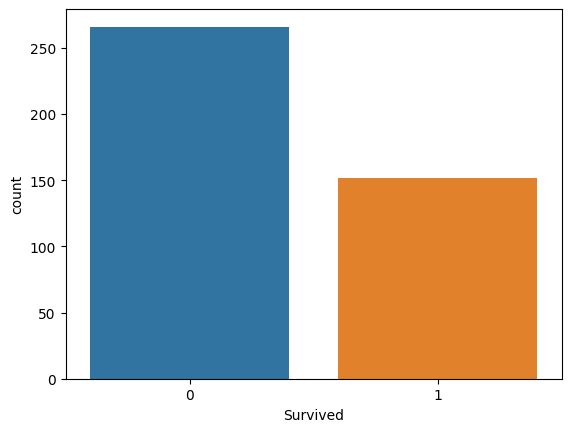

In [62]:
sns.countplot(x='Survived',data=db)